In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
patients_list = []

In [ ]:
pip install pydicom

     |████████████████████████████████| 2.0 MB 6.5 MB/s 


In [ ]:
import shutil
import pprint
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pydicom
import os
import os.path
import scipy.ndimage
import matplotlib.pyplot as plt
import json
from skimage import measure, morphology
from mpl_toolkits.axes_grid1 import ImageGrid
import cv2
from mpl_toolkits.mplot3d.art3d import Poly3DCollection



%matplotlib inline
pp = pprint.PrettyPrinter(indent=2)

In [ ]:
# Create the output folder
output = DATA_PATH
if not os.path.exists(output):
    os.mkdir(output)

In [ ]:

data_path = os.path.join("/content/gdrive/MyDrive/lung_data")

In [ ]:
patients_list = []

In [ ]:
# We iterate over single patients
for patient in os.listdir(data_path):

    # check to see if actually a patient folder
    if patient.startswith('LUNG1-'):
        patient_path = os.path.join(data_path, patient)

        # iterating patient's subdirectories
        for fol in os.listdir(patient_path):

            # get the directory with all the slices
            if(fol.startswith('0')):
              lung_path = os.path.join(patient_path, fol)

              for fol2 in os.listdir(lung_path):
                  if fol2.startswith('0.'):
                    lung_path2 = os.path.join(lung_path,fol2)

                    # prepare for moving the .dcm files by creating a respective output directory
                    patient_slices_path = os.path.join(lung_path2)
                    patient_output = os.path.join(output, patient)
                    os.mkdir(patient_output)

                    #there is a subdirectory that we need to traverse
                    #for files in os.listdir(patient_slices_path):
                    #    patient_slices_path = os.path.join(patient_slices_path, files)

                    #move all dcm files to respective output folder
                    for dcm in os.listdir(patient_slices_path):
                        shutil.move(os.path.join(patient_slices_path, dcm), patient_output)

In [ ]:
#!zip -r '/content/lung_data.zip' '/content/lung_data'

In [ ]:
patients_ids = [x for x in os.listdir(data_path) if not x.startswith('.')]
patients_ids.sort()

In [ ]:
pp.pprint(patients_ids)

[ 'LUNG1-001',
  'LUNG1-004',
  'LUNG1-007',
  'LUNG1-013',
  'LUNG1-029',
  'LUNG1-036',
  'LUNG1-048',
  'LUNG1-051',
  'LUNG1-056',
  'LUNG1-065',
  'LUNG1-071',
  'LUNG1-072',
  'LUNG1-073',
  'LUNG1-075',
  'LUNG1-082',
  'LUNG1-084',
  'LUNG1-086',
  'LUNG1-090',
  'LUNG1-092',
  'LUNG1-093',
  'LUNG1-094',
  'LUNG1-096',
  'LUNG1-097',
  'LUNG1-098',
  'LUNG1-099',
  'LUNG1-100',
  'LUNG1-102',
  'LUNG1-103',
  'LUNG1-104',
  'LUNG1-105',
  'LUNG1-106',
  'LUNG1-108',
  'LUNG1-109',
  'LUNG1-110',
  'LUNG1-111',
  'LUNG1-112',
  'LUNG1-113',
  'LUNG1-114',
  'LUNG1-115',
  'LUNG1-116',
  'LUNG1-118',
  'LUNG1-119',
  'LUNG1-120',
  'LUNG1-121',
  'LUNG1-122',
  'LUNG1-128',
  'LUNG1-132',
  'LUNG1-374',
  'LUNG1-377',
  'LUNG1-383',
  'LUNG1-384',
  'LUNG1-385',
  'LUNG1-386',
  'LUNG1-387',
  'LUNG1-388',
  'LUNG1-389',
  'LUNG1-390',
  'LUNG1-391',
  'LUNG1-392',
  'LUNG1-393',
  'LUNG1-394',
  'LUNG1-395',
  'LUNG1-396',
  'LUNG1-397',
  'LUNG1-398',
  'LUNG1-399',
  'LUNG1-4

In [ ]:

'''import matplotlib.pyplot as plt
import pydicom
import pydicom.data
  
# Full path of the DICOM file is passed in base
base = r"/content/gdrive/MyDrive/NSCLC-Radiomics/LUNG1-127/01-20-2007-StudyID-NA-33440/300.000000-Segmentation-1.939"
pass_dicom = "1-1.dcm"  # file name is 1-12.dcm
  
# enter DICOM image name for pattern
# result is a list of 1 element
filename = pydicom.data.data_manager.get_files(base, pass_dicom)[0]
  
ds = pydicom.dcmread(filename)
  
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)  # set the color map to bone
plt.show()'''

'import matplotlib.pyplot as plt\nimport pydicom\nimport pydicom.data\n  \n# Full path of the DICOM file is passed in base\nbase = r"/content/gdrive/MyDrive/NSCLC-Radiomics/LUNG1-127/01-20-2007-StudyID-NA-33440/300.000000-Segmentation-1.939"\npass_dicom = "1-1.dcm"  # file name is 1-12.dcm\n  \n# enter DICOM image name for pattern\n# result is a list of 1 element\nfilename = pydicom.data.data_manager.get_files(base, pass_dicom)[0]\n  \nds = pydicom.dcmread(filename)\n  \nplt.imshow(ds.pixel_array, cmap=plt.cm.bone)  # set the color map to bone\nplt.show()'

In [ ]:

#patients list is the final product where we have a list, and each element is a:
### dictionary of patient_id, Survival.time as the label, and eventually patient_image

clinical_df = pd.read_csv('NSCLC Radiomics Lung1.clinical-version3-Oct 2019.csv')
for index, row in clinical_df.iterrows():
    if row['PatientID'] in patients_ids:
        this_patient_dict = {'patient_ID': row['PatientID'],
                             'survival_time': row['Survival.time']}
        patients_list.append(this_patient_dict)

In [ ]:
clinical_df

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event
0,LUNG1-001,78.7515,2.0,3,0,IIIb,large cell,male,2165,1
1,LUNG1-002,83.8001,2.0,0,0,I,squamous cell carcinoma,male,155,1
2,LUNG1-003,68.1807,2.0,3,0,IIIb,large cell,male,256,1
3,LUNG1-004,70.8802,2.0,1,0,II,squamous cell carcinoma,male,141,1
4,LUNG1-005,80.4819,4.0,2,0,IIIb,squamous cell carcinoma,male,353,1
...,...,...,...,...,...,...,...,...,...,...
417,LUNG1-418,53.6712,2.0,0,0,I,adenocarcinoma,male,346,1
418,LUNG1-419,66.5096,4.0,1,0,IIIb,squamous cell carcinoma,male,2772,0
419,LUNG1-420,73.3808,2.0,1,0,II,squamous cell carcinoma,male,2429,1
420,LUNG1-421,61.7041,2.0,2,0,IIIa,squamous cell carcinoma,female,369,1


In [ ]:
#data frame exploration.

In [ ]:
pp.pprint(patients_list)

[ {'patient_ID': 'LUNG1-001', 'survival_time': 2165},
  {'patient_ID': 'LUNG1-004', 'survival_time': 141},
  {'patient_ID': 'LUNG1-007', 'survival_time': 137},
  {'patient_ID': 'LUNG1-013', 'survival_time': 3614},
  {'patient_ID': 'LUNG1-029', 'survival_time': 257},
  {'patient_ID': 'LUNG1-036', 'survival_time': 366},
  {'patient_ID': 'LUNG1-048', 'survival_time': 4328},
  {'patient_ID': 'LUNG1-051', 'survival_time': 210},
  {'patient_ID': 'LUNG1-056', 'survival_time': 4454},
  {'patient_ID': 'LUNG1-065', 'survival_time': 131},
  {'patient_ID': 'LUNG1-071', 'survival_time': 2059},
  {'patient_ID': 'LUNG1-072', 'survival_time': 377},
  {'patient_ID': 'LUNG1-073', 'survival_time': 287},
  {'patient_ID': 'LUNG1-075', 'survival_time': 128},
  {'patient_ID': 'LUNG1-082', 'survival_time': 456},
  {'patient_ID': 'LUNG1-084', 'survival_time': 1531},
  {'patient_ID': 'LUNG1-086', 'survival_time': 911},
  {'patient_ID': 'LUNG1-090', 'survival_time': 512},
  {'patient_ID': 'LUNG1-092', 'survival_

In [ ]:
def load_scan(path):
    slices = [pydicom.dcmread(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key=lambda x: float(x.ImagePositionPatient[2]))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)

    for s in slices:
        s.SliceThickness = slice_thickness

        #This was in the code from KNamdar
        if s.AccessionNumber == '':
            s.AccessionNumber = "Blank_Accession_Number"

    return slices

In [ ]:

example_scan = load_scan(os.path.join(data_path, patients_ids[0]))
example_scan[0]['PatientName']

(0010, 0010) Patient's Name                      PN: 'LUNG1-001'

In [ ]:
# Taking care of Hounsfield Unit (HU)
def get_pixels_hu(slices):

    image = np.stack([s.pixel_array for s in slices])

    # int16 should be enough for the pixel data. We use it to save memory
    image = image.astype(np.int16)

    # Set outside-of-scan pixels to 0 (in some machines it is set to -2000)
    # The intercept is usually -1024, so air is approximately 0
    image[image == -2000] = 0

    # Convert to Hounsfield units (HU)
    for slice_number in range(len(slices)):

        intercept = slices[slice_number].RescaleIntercept
        slope = slices[slice_number].RescaleSlope

        if slope != 1:
            image[slice_number] = slope * image[slice_number].astype(np.float64)
            image[slice_number] = image[slice_number].astype(np.int16)

        image[slice_number] += np.int16(intercept)

    return np.array(image, dtype=np.int16)

In [ ]:
# This number indicates which slice of this patient's scan to be shown
NUM_SLICE = 45

def single_patient_visualization(patient):
    patient_scan = load_scan(os.path.join(data_path, patient))
    patient_pixels = get_pixels_hu(patient_scan)
    plt.hist(patient_pixels.flatten(), bins=80, color='c')
    plt.xlabel("Hounsfield Units (HU)")
    plt.ylabel("Frequency")
    plt.show()

    print(patient_pixels.shape)
    # Show a random slices
    plt.imshow(patient_pixels[NUM_SLICE], cmap=plt.cm.gray)
    plt.show()

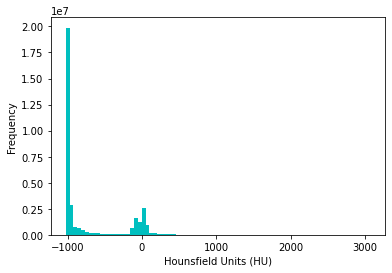

(129, 512, 512)


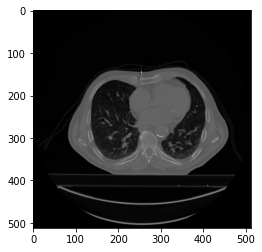

In [ ]:

# Arbitrarily visualizing a single patient

single_patient_visualization(patients_list[2]['patient_ID'])

In [ ]:
scan = load_scan(os.path.join(data_path,patients_list[13]['patient_ID']))
image = get_pixels_hu(scan)

In [ ]:
def plot_3d(image, threshold=-300):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
    
    verts, faces, _, _  = measure.marching_cubes_lewiner(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

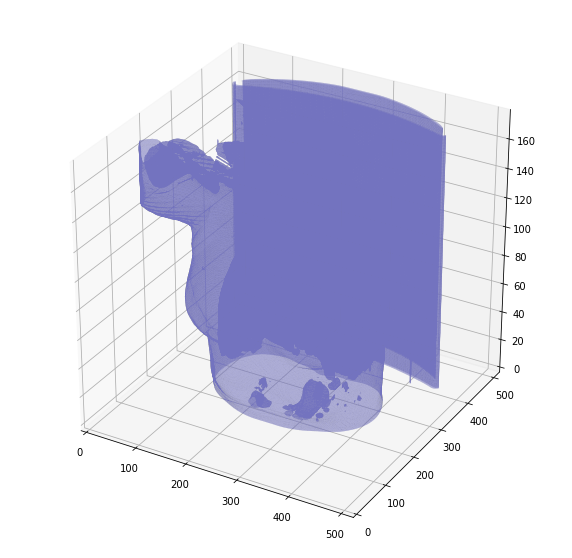

In [ ]:
#basic 3d visualisation
plot_3d(image)


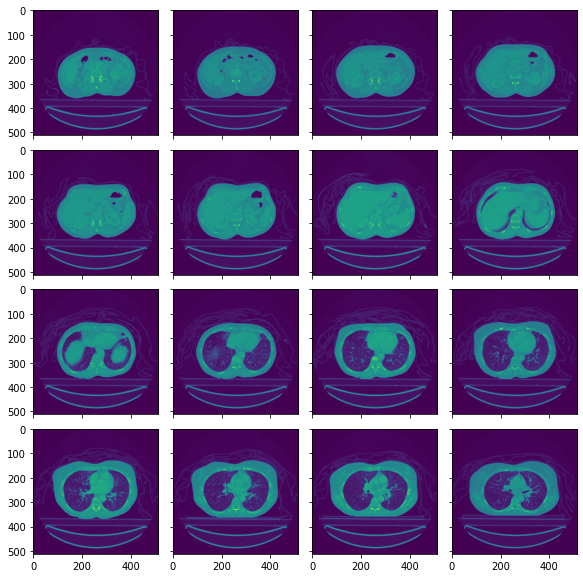

In [ ]:

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(4, 4),  # creates 4 * 4 grid of axes
                 axes_pad=0.2,  # pad between axes in inch.
                 )

for ax, im in zip(grid, image[0:80:5]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

In [ ]:
#Preprocessing

In [ ]:
#PATIENT HISTRORY EXPLORATION

In [ ]:
df=df.replace('Adenocarcinoma',0)
df=df.replace('adenocarcinoma',0)
df=df.replace('large cell',1)
df=df.replace('squamous cell carcinoma',2)
df=df.replace('Squamous cell carcinoma',2)
df=df.replace('nos',3)
df=df.replace('NSCLC NOS (not otherwise specified)',3)

In [ ]:
df

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event
0,LUNG1-001,78.7515,2.0,3,0,IIIb,1.0,male,2165,1
1,LUNG1-002,83.8001,2.0,0,0,I,2.0,male,155,1
2,LUNG1-003,68.1807,2.0,3,0,IIIb,1.0,male,256,1
3,LUNG1-004,70.8802,2.0,1,0,II,2.0,male,141,1
4,LUNG1-005,80.4819,4.0,2,0,IIIb,2.0,male,353,1
...,...,...,...,...,...,...,...,...,...,...
417,LUNG1-418,53.6712,2.0,0,0,I,0.0,male,346,1
418,LUNG1-419,66.5096,4.0,1,0,IIIb,2.0,male,2772,0
419,LUNG1-420,73.3808,2.0,1,0,II,2.0,male,2429,1
420,LUNG1-421,61.7041,2.0,2,0,IIIa,2.0,female,369,1


In [ ]:
df['Overall.Stage'].value_counts()

IIIb    176
IIIa    112
I        93
II       40
Name: Overall.Stage, dtype: int64

In [ ]:
df['gender'].value_counts()

male      290
female    132
Name: gender, dtype: int64

In [ ]:
df['deadstatus.event'].value_counts()

1    373
0     49
Name: deadstatus.event, dtype: int64

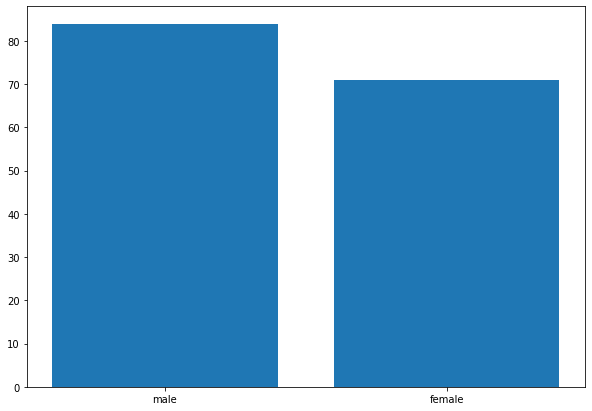

In [ ]:

import pandas as pd
from matplotlib import pyplot as plt
 
age = df['age'].head(12)
gender = df['gender'].head(12)
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(gender[0:10], age[0:10])
 
# Show Plot
plt.show()